# The Project 
This project constituted the final assignment for the specialized program offered by the University of Michigan on Coursera. Within this project, I had to utilize the modules Pillow, OpenCV, Pytesseract, and Zip.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [8]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')



[ERROR:0@0.016] global persistence.cpp:519 open Can't open file: 'readonly/haarcascade_frontalface_default.xml' in read mode


In [2]:
def text_and_faces(string, file_path = "readonly/small_img.zip"):
   
    with zipfile.ZipFile(file_path, "r") as zip_file:
        for file_name in zip_file.namelist():
            with zip_file.open(file_name) as image_file:
                text = pytesseract.image_to_string(Image.open(image_file).convert('L'))
                if string in text:
                    face_images = []
                    img = np.array(Image.open(image_file))
                    faces = face_cascade.detectMultiScale(img, 1.5)
                    pil_image = Image.fromarray(img)
                    for x, y, w, h in faces:
                        face_img = Image.fromarray(img[y:y+h, x:x+w])
                        face_images.append(face_img) 
                    # Calculate the number of rows and columns needed for the contact sheet
                    num_rows = (len(face_images) + 4) // 5
                    num_cols = 5
                    # Create a contact sheet by concatenating the face images
                    if len(face_images) >= 1:
                        print("Results found in file {}".format(file_name))
                        face_width, face_height = (100, 100)
                        contact_sheet_width = num_cols * face_width
                        contact_sheet_height = num_rows * face_height
                        contact_sheet = Image.new(face_images[0].mode, (contact_sheet_width, contact_sheet_height))
                        
                        i = 0
                        x = 0
                        y = 0
                        while i < len(face_images):
                            face_img = face_images[i]
                            # Resize the face image to half its original size
                            face_img.thumbnail((face_width, face_height)) 
                            contact_sheet.paste(face_img, (x, y))
                            x += face_width
                            i += 1
                            if i % num_cols == 0:  # Start a new row
                                x = 0
                                y += face_height
                                
                        # Display the contact sheet
                        contact_sheet = contact_sheet.resize((int(contact_sheet.width), int(contact_sheet.height)))
                        display(contact_sheet)
                    else:
                        print("Results found in file {} \nBut there were not faces in that file".format(file_name))
                else:
                    continue

Results found in file a-0.png


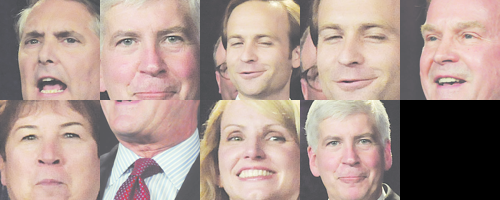

Results found in file a-3.png


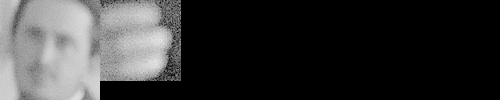

In [3]:
text_and_faces("Christopher")

Results found in file a-0.png


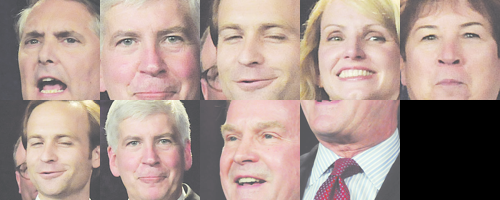

Results found in file a-1.png


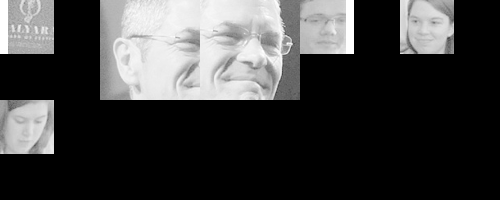

Results found in file a-10.png 
But there were not faces in that file
Results found in file a-13.png


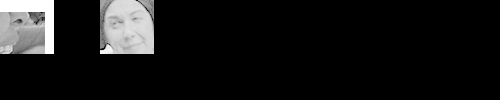

Results found in file a-2.png


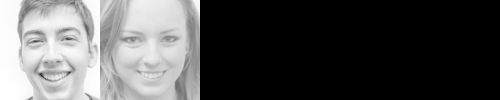

Results found in file a-3.png


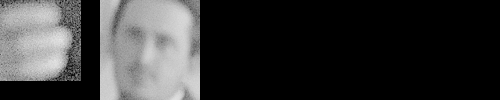

Results found in file a-8.png


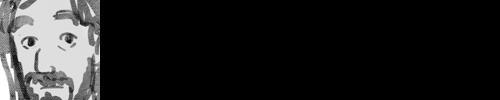

In [4]:
text_and_faces("Mark","readonly/images.zip")